In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import typing as tp
import yaml
import random
import os
import sys
import soundfile as sf
import librosa
import librosa.display
import cv2
import matplotlib.pyplot as plt
import time
import pickle
import glob
from tqdm import tqdm
import IPython.display

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
# import resnest.torch as resnest_torch

from torchvision import models

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
# from resnet import ResNet, Bottleneck

from albumentations.core.transforms_interface import DualTransform, BasicTransform
import albumentations as albu

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [25]:
INPUT_ROOT = Path("/home/knikaido/work/Rainforest-Connection/data")
RAW_DATA = INPUT_ROOT / "rfcx-species-audio-detection"
TRAIN_AUDIO_DIR = RAW_DATA / "train_denoise"
# TRAIN_RESAMPLED_AUDIO_DIRS = [
#   INPUT_ROOT / "birdsong-resampled-train-audio-{:0>2}".format(i)  for i in range(5)
# ]
TEST_AUDIO_DIR = RAW_DATA / "test"
FEAT_DIR =  '/home/knikaido/work/Rainforest-Connection/Git/feature/05/'
TRAIN_PRED_DIR = '/home/knikaido/work/Rainforest-Connection/Git/33/output/train_pred/'
PERIOD = 10.0

In [3]:
audio_pathes = sorted(glob.glob(str(TRAIN_AUDIO_DIR) + '/*.flac'))
len(audio_pathes)

4727

In [7]:
train_df = pd.read_pickle(RAW_DATA / "train_gby_wav_raw_denoise.pkl")
train_df

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max,name
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25,/home/knikaido/work/Rainforest-Connection/data...
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40,/home/knikaido/work/Rainforest-Connection/data...
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25,/home/knikaido/work/Rainforest-Connection/data...
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04,/home/knikaido/work/Rainforest-Connection/data...
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70,/home/knikaido/work/Rainforest-Connection/data...
...,...,...,...,...,...,...,...,...
1211,fe8d9ac40,13,1,53.4720,93.750,54.0960,843.75,/home/knikaido/work/Rainforest-Connection/data...
1212,fea6b438a,4,1,43.5787,2531.250,45.7653,4031.25,/home/knikaido/work/Rainforest-Connection/data...
1213,ff2eb9ce5,0,1,15.2267,5906.250,16.0213,8250.00,/home/knikaido/work/Rainforest-Connection/data...
1214,ffb8d8391,5,1,14.3467,4781.250,16.6987,10406.20,/home/knikaido/work/Rainforest-Connection/data...


In [30]:
index = 0

In [35]:
def read_cut_wav(index):
    
    wav, sr = sf.read(train_df['name'][index])
    SR = sr
    len_y = len(wav)
    effective_length = int(sr * PERIOD)

    tmin = max(SR * (train_df['t_min'][index]), SR * 0.001)
    tmax = min(SR * (train_df['t_max'][index]), len_y - ( SR * 0.001 ))      

    start_min = max(0, tmax-effective_length)
    start_max = min(tmin, len_y - effective_length)
    start = np.random.randint(start_min, start_max)
    end = start + effective_length
    wav_ele = wav[start:end]
    
    return wav_ele

In [36]:
y1_ele = read_cut_wav(index)

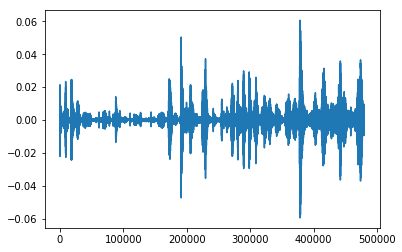

In [37]:
plt.plot(y1_ele)

In [38]:
IPython.display.Audio(y1_ele, rate=sr)

In [39]:
index2 = 10

In [40]:
y2_ele = read_cut_wav(index2)

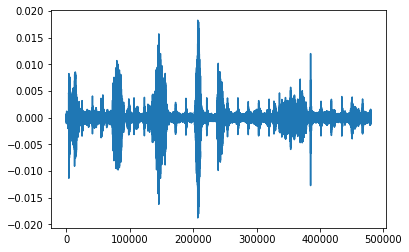

In [41]:
plt.plot(y2_ele)

In [42]:
IPython.display.Audio(y2_ele, rate=sr)

In [46]:
y3_ele = y1_ele * (np.max(y2_ele) / np.max(y1_ele)) + y2_ele

In [47]:
IPython.display.Audio(y3_ele, rate=sr)

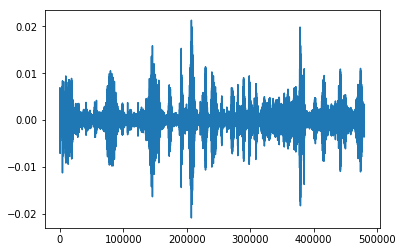

In [48]:
plt.plot(y3_ele)